In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from astropy.io import fits
from scipy import stats
%matplotlib inline

In [13]:
%cd /Users/lchevalier/Dropbox/Project1_N4526/NGVS

/Users/lchevalier/Dropbox/Project1_N4526/NGVS


In [14]:
def best_fit(X, Y):
    
    

    xbar = np.mean(X)#sum(X)/len(X)
    ybar = np.mean(Y)#sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

def trendline(xd, yd, order=1, c='r', alpha=1, Rval=False):
    """Make a line of best fit"""

    #Calculate trendline
    coeffs = np.polyfit(xd, yd, order)

    intercept = coeffs[-1]
    slope = coeffs[-2]
    power = coeffs[0] if order == 2 else 0

    minxd = np.min(xd)
    maxxd = np.max(xd)

    xl = np.array([minxd, maxxd])
    yl = power * xl ** 2 + slope * xl + intercept

    #Plot trendline
    plt.plot(xl, yl, c, alpha=alpha)

    #Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(yd) / len(yd)
    ssreg = np.sum((p(xd) - ybar) ** 2)
    sstot = np.sum((yd - ybar) ** 2)
    Rsqr = ssreg / sstot

    if not Rval:
        #Plot R^2 value
        print (0.8 * maxxd + 0.2 * minxd, 0.8 * np.max(yd) + 0.2 * np.min(yd),
                 '$R^2 = %0.2f$' % Rsqr)
    else:
        #Return the R^2 value:
        return Rsqr
    
def diviation(sources):
    x=sources
    lenght= len(sources)
    mean=np.mean(sources)
    standart_dev=(sum((x-mean)**2)/lenght)**0.5
    variance=(sum((x-mean)**2)/lenght)
    
    return standart_dev,variance

def RMS(sources):
    mag= sources
    rms=np.sqrt(np.mean(mag**2))
    
    return rms

def FWHM(sources):
    fwhm=2*np.sqrt(2*np.log(2)*diviation(sources)[0])
    
    return fwhm

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [29]:
filename= 'NGVS_R_matched.fits'#'NGVS_R_new_ZP.fits'
filename2= 'NGVS_GRI_matched.fits'#'N4526_NGVS_Subaru_griz.fits'
filename3='HST_NGVS_GZ_match.fits'
hdulist=fits.open(filename)
hdulist2=fits.open(filename2)
hdulist3=fits.open(filename3)
N4526=hdulist[1].data
N45262=hdulist2[1].data
N45263=hdulist3[1].data
Apertures=np.arange(1,11,0.5)

cols=hdulist3[1].columns
Zmag_HST='zamag'

Gmag_HST='gamag'
Imag= 'MAG_APER_3_14'
Gmag='MAG_APER_1_14'
Rmag='MAG_APER_2_14'


Imag2= 'MAG_APER_3_17'
Gmag2='MAG_APER_1_17'
Rmag2='MAG_APER_2_17'

CFHT_G= 'col6_1'
#CFHT_U='col6_1'
CFHT_R='col6'
CFHT_I='col6_2'
CFHT_Z='col6_3'
Delta_R = N4526[CFHT_R]-(N4526[Rmag])#+0.68)
Delta_G = N45262[CFHT_G]-(N45262[Gmag])#+0.3)#-0.15+0.0085
Delta_I = N45262[CFHT_I]-(N45262[Imag])#+0.25)#-0.123+0.0092

Delta_R2 = N4526[CFHT_R]-(N4526[Rmag2])-0.68
Delta_G2 = N45262[CFHT_G]-N45262[Gmag2]-0.3
Delta_I2 = N45262[CFHT_I]-N45262[Imag2]-0.25

Delta_Z = N45263[CFHT_Z]-N45263[Zmag_HST]
Delta_GH = N45263[CFHT_G]-N45263[Gmag_HST]

In [30]:
print cols.names

['recno', 'VCC', 'RAJ2000', 'new_RA', 'DEJ2000', 'new_Dec', 'GDist', 'zmag', 'e_zmag', 'zamag', 'e_zamag', 'gmag', 'e_gmag', 'gamag', 'e_gamag', 'rhz', 'e_rhz', 'rhg', 'e_rhg', 'pGC', 'E(B-V)', 'bz', 'bg', 'col4_1', 'col5_1', 'col1_1', 'col2_1', 'col3_1', 'col6_1', 'col7_1', 'col8_1', 'col9_1', 'col10_1', 'col11_1', 'col12_1', 'col13_1', 'col14_1', 'col15_1', 'col16_1', 'col17_1', 'col18_1', 'col19_1', 'col20_1', 'col21_1', 'col1_2', 'col2_2', 'col3_2', 'col4_2', 'col5_2', 'col6_2', 'col7_2', 'col8_2', 'col9_2', 'col10_2', 'col11_2', 'col12_2', 'col13_2', 'col14_2', 'col15_2', 'col16_2', 'col17_2', 'col18_2', 'col19_2', 'col20_2', 'col21_2', 'col1_3', 'col2_3', 'col3_3', 'col4_3', 'col5_3', 'col6_3', 'col7_3', 'col8_3', 'col9_3', 'col10_3', 'col11_3', 'col12_3', 'col13_3', 'col14_3', 'col15_3', 'col16_3', 'col17_3', 'col18_3', 'col19_3', 'col20_3', 'col21_3', 'Separation']


-0.00993919
RMS 0.0529048
standart diviation 0.0522277403135


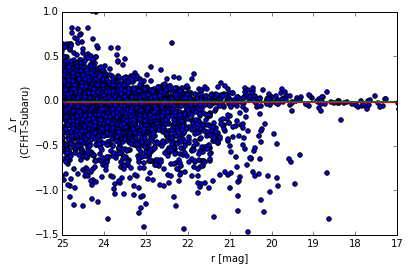

/Users/lchevalier/Downloads/Ureka/variants/common/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in greater
/Users/lchevalier/Downloads/Ureka/variants/common/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in less


In [31]:
#print np.median(Delta_R)#[(N4526[Rmag]<=20)&(N4526[Rmag]>=17)])

print np.median(Delta_R[(N4526[Rmag]>17)&(N4526[Rmag]<20)&(Delta_R>-0.3)&(Delta_R<0.3)])
print 'RMS', RMS(Delta_R[(N4526[Rmag]>17)&(N4526[Rmag]<20)&(Delta_R>-0.3)&(Delta_R<0.3)])
print 'standart diviation', diviation(Delta_R[(N4526[Rmag]>17)&(N4526[Rmag]<20)&(Delta_R>-0.3)&(Delta_R<0.3)])[0]

plt.figure()
#plt.title('$\Delta$ R')
plt.scatter(N4526[Rmag],Delta_R)
plt.xlabel('r [mag]')
plt.ylabel('$\Delta$ r \n (CFHT-Subaru)')
plt.ylim(-1.5,1)
plt.xlim(25,17)
plt.axhline(np.median(Delta_R[(N4526[Rmag]>17)&(N4526[Rmag]<20)&(Delta_R>-0.3)&(Delta_R<0.3)]),c='r')
#X=np.arange(16,26,0.5)
#e,f = best_fit(N4526[Rmag][(N4526[Rmag]<=20)&(N4526[Rmag]>=17)&(Delta_R>-0.3)&(Delta_R<0.3)],Delta_R[(N4526[Rmag]<=20)&(N4526[Rmag]>=17)&(Delta_R>-0.1)&(Delta_R<0.2)&(N4526[Rmag]>=18)])
#yfit = [e + f * xi for xi in X]
#plt.plot(X, yfit)
plt.axhline(0,c='g')
plt.savefig('Delta_R.png')

plt.show()
offset=np.median(Delta_R2[(N4526[Rmag2]>17)&(N4526[Rmag2]<20)&(Delta_R2>-0.2)&(Delta_R2<0.2)])
new_offset =np.median(Delta_R2[(N4526[Rmag2]-offset>17)&(N4526[Rmag2]-offset<20)&(Delta_R2-offset>-0.2)&(Delta_R2-offset<0.2)]-offset)


#plt.figure()
#plt.title('$\Delta$ R')
#plt.scatter(N4526[Rmag2]-offset,Delta_R2-offset)
#plt.xlabel('Rmag')
#plt.ylabel('$\Delta$ R \n (CFHT-Subaru)')
#plt.ylim(-1.5,1)
#plt.xlim(25,17)
#plt.axhline(new_offset, c='r')
#print 'new offset',np.median(Delta_R2[(N4526[Rmag2]-offset>17)&(N4526[Rmag2]-offset<20)&(Delta_R2-offset>-0.2)&(Delta_R2-offset<0.2)]-offset)
#print 'new RMS', RMS(Delta_R2[(N4526[Rmag2]-offset>17)&(N4526[Rmag2]-offset<20)&(Delta_R2-offset>-0.2)&(Delta_R2-offset<0.2)]-offset)
#print 'new standart diviation', diviation(Delta_R2[(N4526[Rmag2]-offset>17)&(N4526[Rmag2]-offset<20)&(Delta_R2-offset>-0.2)&(Delta_R2-offset<0.2)]-offset)[0]

-0.00444543
RMS nan
standart diviation 0.0563433601686


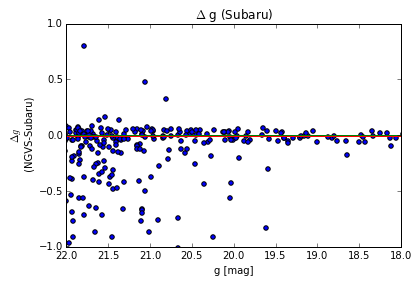

In [32]:
print np.mean(Delta_G[(N45262[Gmag]<=20)&(N45262[Gmag]>=17)&(Delta_G<20)&(Delta_G<0.2)&(Delta_G>-0.2)])
print 'RMS', RMS(Delta_G[(N45262[Gmag]>17)&(N45262[Gmag]<20)&(Delta_G>0.2)&(Delta_G<0.2)])
print 'standart diviation', diviation(Delta_G[(N45262[Gmag]>17)&(N45262[Gmag]<20)&(Delta_G>-0.2)&(Delta_G<0.2)])[0]

#print np.median(Delta_G[(N45262[Gmag]<=22)&(N45262[Gmag]>=17)])
plt.figure()
plt.title('$\Delta$ g (Subaru)')
plt.ylabel('$\Delta g$ \n (NGVS-Subaru)')
plt.xlabel('g [mag]')
plt.scatter(N45262[Gmag],Delta_G)
plt.ylim(-1,1)
plt.xlim(22,18)
#plt.xlim(30,14)


#X= np.arange(14,28,1)
slope, intercept, r_value, p_value, std_err = stats.linregress(N45262[Gmag][(N45262[Gmag]<=20)&(N45262[Gmag]>=10)&(Delta_G<20)],Delta_G[(N45262[Gmag]<=20)&(N45262[Gmag]>=10)&(Delta_G<20)])
#intercept=0
line = slope*X+intercept
#plt.plot(X, line)

#c,d = best_fit(N45262[Gmag][(N45262[Gmag]<=19)&(N45262[Gmag]>=18)&(Delta_G<0.15)&(Delta_G>-0.15)],Delta_G[(N45262[Gmag]<=19)&(Delta_G<20)&(Delta_G>-0.15)&(N45262[Gmag]>=18)])
#yfit = [c + d * xi for xi in X]
#plt.plot(X, yfit)

#trendline(N45262[Gmag][(N45262[Gmag]<=22)&(N45262[Gmag]>=10)],Delta_G[(N45262[Gmag]<=22)&(N45262[Gmag]>=10)])

#result = np.polyfit(N45262[Gmag][(N45262[Gmag]<=20)&(N45262[Gmag]>=17.5)&(Delta_G<20)&(Delta_G>-0.15)&(Delta_G>-0.6)],Delta_G[(N45262[Gmag]<=20)&(N45262[Gmag]>=17.5)&(Delta_G<20)&(Delta_G>-0.15)&(Delta_G>-0.6)], 1)

#fig=plt.figure()
#ax1=fig.add_subplot(111)

#plt.plot(plt.xlim(), np.polyval(result, plt.xlim()), 'r-')
plt.axhline(np.median(Delta_G[(N45262[Gmag]<=20)&(N45262[Gmag]>=17)&(Delta_G<20)&(Delta_G>-0.2)&(Delta_G>-0.2)]),c='r')
plt.axhline(0,c='g')
plt.savefig('Delta_g.png')

offset = np.mean(Delta_G2[(N45262[Gmag2]<=20)&(N45262[Gmag2]>=17)&(Delta_G2<20)&(Delta_G2<0.2)&(Delta_G2>-0.2)])
new_offset=np.mean(Delta_G2[(N45262[Gmag2]-offset<=20)&(N45262[Gmag2]-offset>=17)&(Delta_G2-offset<20)&(Delta_G2-offset<0.2)&(Delta_G2-offset>-0.2)]-offset)

#plt.figure()
#plt.title('$\Delta$ g (Subaru)')
#plt.ylabel('$\Delta g$ \n (NGVS-Subaru)')
#plt.xlabel('gmag')
#plt.scatter(N45262[Gmag2]-offset,Delta_G2-offset)
#plt.ylim(-1,1)
#plt.xlim(22,18)
#plt.axhline(new_offset, c='r')
#print 'new offset', np.mean(Delta_G2[(N45262[Gmag2]-offset<=20)&(N45262[Gmag2]-offset>=17)&(Delta_G2-offset<20)&(Delta_G2-offset<0.2)&(Delta_G2-offset>-0.2)]-offset)
#print 'RMS', RMS(Delta_G2[(N45262[Gmag2]-offset>17)&(N45262[Gmag2]-offset<20)&(Delta_G2-offset>0.2)&(Delta_G2-offset<0.2)]-offset)
#print 'standart diviation', diviation(Delta_G2[(N45262[Gmag2]-offset>17)&(N45262[Gmag2]-offset<20)&(Delta_G2-offset>-0.2)&(Delta_G2-offset<0.2)]-offset)[0]

plt.show()

median -0.0165691
RMS 0.0575114
standart diviation 0.0573430265402


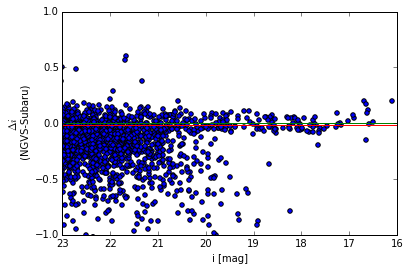

In [33]:
#print np.median(Delta_I[(N45262[Imag]<=20)&(N45262[Imag]>=17)])

print 'median',np.median(Delta_I[(N45262[Imag]<=20)&(N45262[Imag]>=18)&(Delta_I<0.2)&(Delta_I>-0.2)])
print 'RMS', RMS(Delta_I[(N45262[Imag]<=20)&(N45262[Imag]>=18)&(Delta_I<0.2)&(Delta_I>-0.2)])
print 'standart diviation', diviation(Delta_I[(N45262[Imag]<=20)&(N45262[Imag]>=18)&(Delta_I<0.2)&(Delta_I>-0.2)])[0]
plt.figure()
#plt.title('$\Delta$ i (Subaru)')
plt.ylabel('$\Delta i$ \n (NGVS-Subaru)')
plt.xlabel('i [mag]')
plt.scatter(N45262[Imag],Delta_I)
plt.ylim(-1,1)
plt.xlim(23,16)
X=np.arange(16,26,0.5)

#c,d = best_fit(N45262[Imag][(N45262[Imag]<=20)&(N45262[Imag]>=17)&(Delta_I<0.5)&(Delta_I>-0.5)],Delta_I[(N45262[Imag]<20)&(Delta_I<1)&(N45262[Imag]>=17)&(Delta_I<0.5)&(Delta_I>-0.5)])
plt.axhline(np.median(Delta_I[(N45262[Imag]<=20)&(N45262[Imag]>=18)&(Delta_I<0.2)&(Delta_I>-0.2)]),c='r')
plt.axhline(0,c='g')
#yfit = [c + d * xi for xi in X]
#plt.plot(X, yfit)
plt.savefig('Delta_i.png')

plt.show()

offset=np.median(Delta_I2[(N45262[Imag2]<=20)&(N45262[Imag2]>=18)&(Delta_I2<0.2)&(Delta_I2>-0.2)])
new_offset= np.median(Delta_I2[(N45262[Imag2]-offset<=20)&(N45262[Imag2]-offset>=18)&(Delta_I2-offset<0.2)&(Delta_I2-offset>-0.2)]-offset)

#plt.figure()
#plt.title('$\Delta$ i (Subaru)')
#.ylabel('$\Delta i$ \n (NGVS-Subaru)')
#plt.xlabel('imag')
#plt.scatter(N45262[Imag2]-offset,Delta_I2-offset)
#plt.ylim(-1,1)
#plt.xlim(23,16)
#plt.axhline(new_offset, c='r')

#print 'new offset',np.median(Delta_I2[(N45262[Imag2]-offset<=20)&(N45262[Imag2]-offset>=18)&(Delta_I2-offset<0.2)&(Delta_I2-offset>-0.2)]-offset)
#print 'RMS', RMS(Delta_I2[(N45262[Imag2]-offset<=20)&(N45262[Imag2]-offset>=18)&(Delta_I2-offset<0.2)&(Delta_I2-offset>-0.2)]-offset)
#print 'standart diviation', diviation(Delta_I2[(N45262[Imag2]-offset<=20)&(N45262[Imag2]-offset>=18)&(Delta_I2-offset<0.2)&(Delta_I2-offset>-0.2)]-offset)[0]
plt.show()

0.0714502
best fit line:
y = -1.05 + 0.05x


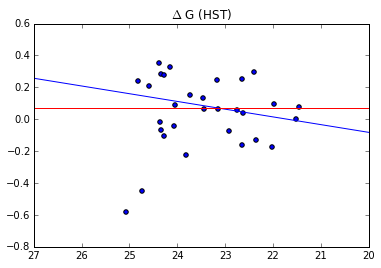

In [34]:
print np.median(Delta_GH[(N45263[Gmag_HST]>=20)&(N45263[Gmag_HST]<=26)&(Delta_GH>-0.4)])#[(N45263[Gmag_HST]<=23)])
plt.figure()
plt.title('$\Delta$ G (HST)')
plt.scatter(N45263[Gmag_HST],Delta_GH)
#plt.ylim(-0.5,0.5)
plt.xlim(27,20)
X= np.arange(20,28,1)
a,b = best_fit(N45263[Gmag_HST][(N45263[Gmag_HST]>=20)&(N45263[Gmag_HST]<=26)&(Delta_GH>-0.4)],Delta_GH[(N45263[Gmag_HST]>=20)&(N45263[Gmag_HST]<=26)&(Delta_GH>-0.4)])
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
plt.axhline(np.median(Delta_GH[(N45263[Gmag_HST]>=20)&(N45263[Gmag_HST]<=26)&(Delta_GH>-0.4)]),c='r')
plt.show()

0.241501


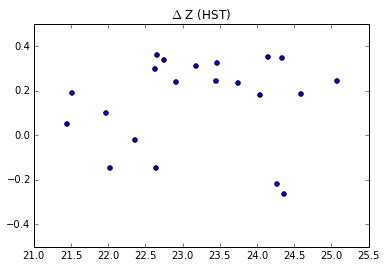

In [35]:
print np.median(Delta_Z[(N45263[Zmag_HST]<=23)])
plt.figure()
plt.title('$\Delta$ Z (HST)')
plt.scatter(N45263[Gmag_HST],Delta_Z)
plt.ylim(-0.5,0.5)
#plt.xlim(28,14)
plt.show()

In [22]:
np.median(Delta_R[(N4526[Rmag]<18.5)&(N4526[Rmag]>21)])

nan

In [23]:
Delta_R[(N4526[Rmag]>21)]
print len(Delta_G)
print len(Delta_R)

4680
3565


In [24]:
new_aper= np.arange(4,22,0.5)
print new_aper
print len(np.arange(4,22,0.5))

[  4.    4.5   5.    5.5   6.    6.5   7.    7.5   8.    8.5   9.    9.5
  10.   10.5  11.   11.5  12.   12.5  13.   13.5  14.   14.5  15.   15.5
  16.   16.5  17.   17.5  18.   18.5  19.   19.5  20.   20.5  21.   21.5]
36


In [25]:
aperatures = np.array([0,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5])

In [37]:
print aperatures[17]
print new_aper[10]

9.0
9.0


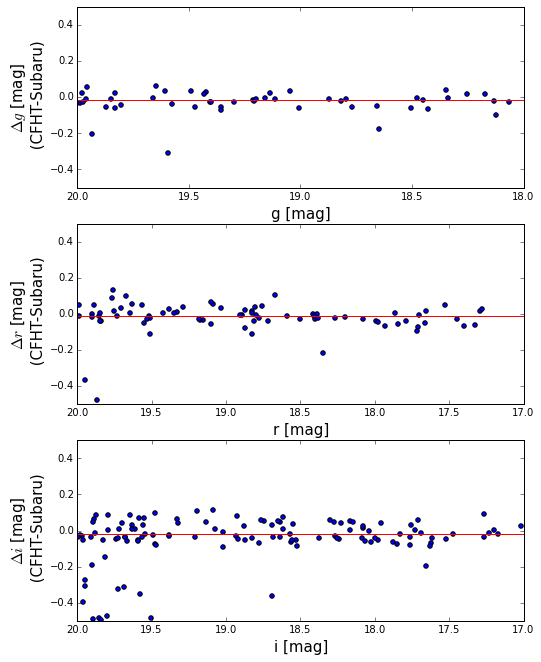

In [7]:
plt.figure(figsize=(8,11))
plt.subplot(311)
#plt.title('$\Delta$ g (Subaru)')
plt.ylabel('$\Delta g$ [mag] \n (CFHT-Subaru)', size=15)
plt.xlabel('g [mag]', size=15)
plt.scatter(N45262[Gmag],Delta_G)
plt.ylim(-0.5,0.5)
plt.xlim(20,18)
plt.axhline(np.median(Delta_G[(N45262[Gmag]<=20)&(N45262[Gmag]>=18)&(Delta_G<20)&(Delta_G>-0.2)&(Delta_G>-0.2)]),c='r')


plt.subplot(312)
#plt.title('$\Delta$ R')
plt.scatter(N4526[Rmag],Delta_R)
plt.xlabel('r [mag]', size=15)
plt.ylabel('$\Delta r$ [mag] \n (CFHT-Subaru)',size=15)
plt.ylim(-0.5,0.5)
plt.xlim(20,17)
plt.axhline(np.median(Delta_R[(N4526[Rmag]>17)&(N4526[Rmag]<20)&(Delta_R>-0.2)&(Delta_R<0.2)]),c='r')


plt.subplot(313)
#plt.title('$\Delta$ i (Subaru)')
plt.ylabel('$\Delta i$ [mag] \n (CFHT-Subaru)', size=15)
plt.xlabel('i [mag]', size= 15)
plt.scatter(N45262[Imag],Delta_I)
plt.ylim(-0.5,0.5)
plt.xlim(20,17)
X=np.arange(16,26,0.5)
plt.axhline(np.median(Delta_I[(N45262[Imag]<=20)&(N45262[Imag]>=17)&(Delta_I<0.2)&(Delta_I>-0.2)]),c='r')
plt.savefig('NGVS_RMS.png')
plt.show()